## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import signal

def rgb2gray(rgb_image):
    return np.dot(rgb_image[...,:3], [0.299, 0.587, 0.114])

## Load Image

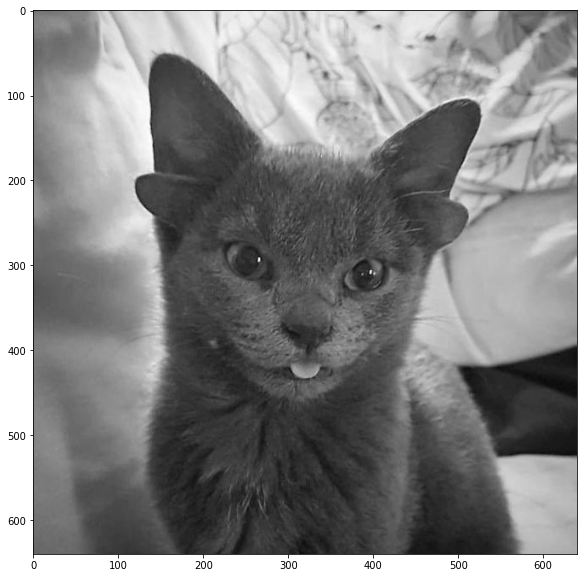

In [2]:
image = mpimg.imread("images/cat.jpeg")
image_gr = rgb2gray(image)

figureSize = (12,10)
plt.figure("Original Image", figsize=figureSize)
plt.imshow(image_gr)
plt.set_cmap("gray")

## Add Noise

## Gaussian Filter

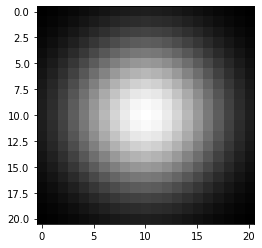

In [3]:
def gaussian_kernel( kernlen , std ):
    """Returns a 2D Gaussian kernel array."""
    gkern1d = signal.gaussian(kernlen, std=std).reshape(kernlen, 1)
    gkern2d = np.outer(gkern1d, gkern1d)
    return gkern2d

plt.imshow(gaussian_kernel(21,5), interpolation='none')

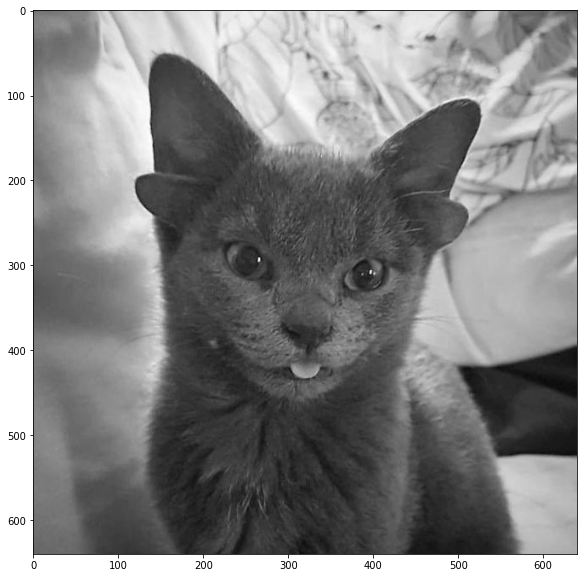

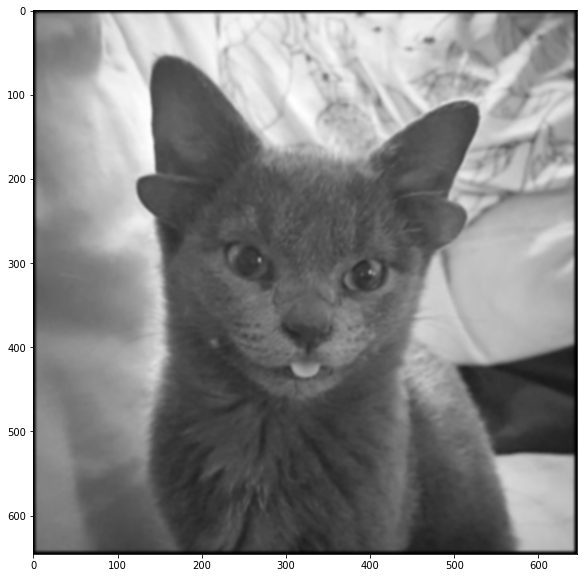

In [4]:
def gaussian_smooth(img, kernel_dim, std):
    return signal.convolve2d(img, gaussian_kernel(kernel_dim, std))

plt.figure("Noised", figsize = figureSize)
plt.imshow(image_gr)

plt.figure("Smoothed", figsize = figureSize)
plt.imshow(gaussian_smooth(image_gr, 7, 1.5))

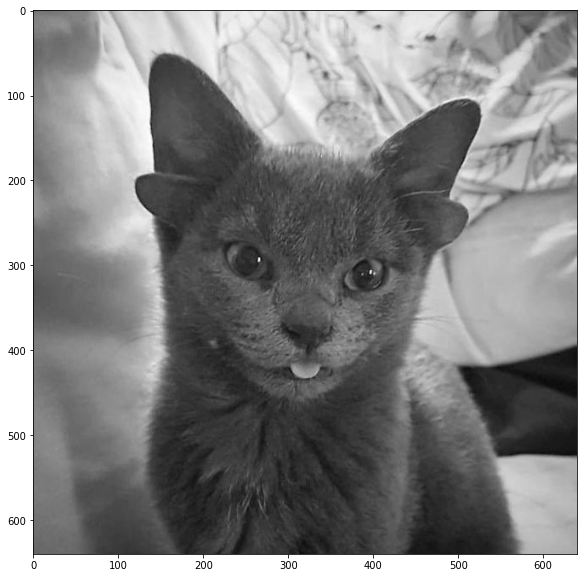

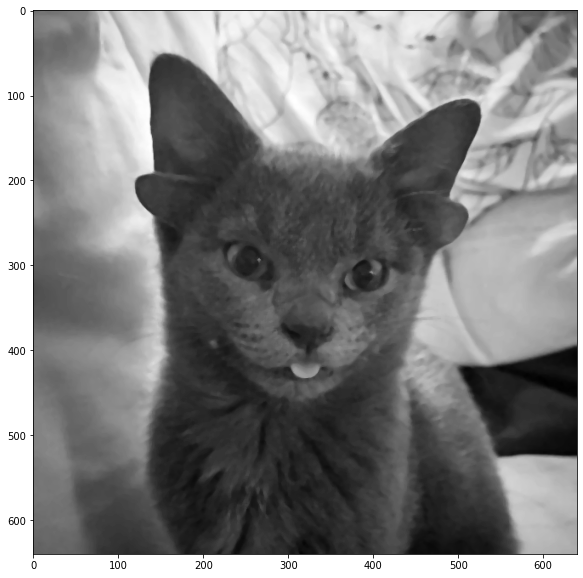

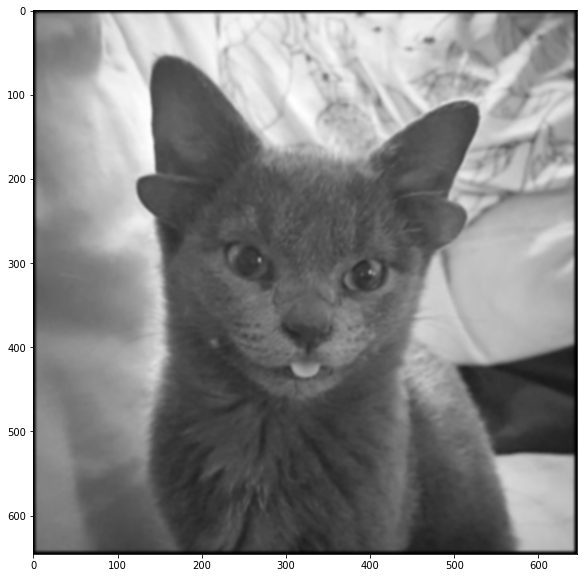

In [5]:
def median_filter(img, dim):
    y_size = img.shape[0]
    x_size = img.shape[1]
    retl = np.zeros((y_size, x_size)).tolist()
    for i in range(y_size):
        for j in range(x_size):
            y_min = max(0, i-dim//2)
            y_max = min(y_size-1, i+dim//2)
            x_min = max(0, j-dim//2)
            x_max = min(x_size-1, j+dim//2)
            tmp = (img[y_min:(y_max+1), x_min:(x_max+1)].ravel()).tolist()
            retl[i][j] = sorted(tmp)[len(tmp) // 2]
    return np.asarray(retl)

plt.figure("Noised", figsize = figureSize)
plt.imshow(image_gr)

plt.figure("Smoothed_Median", figsize = figureSize)
plt.imshow(median_filter(image_gr, 5))

plt.figure("Smoothed_Gaussian", figsize = figureSize)
plt.imshow(gaussian_smooth(image_gr, 7, 1.5))
                

## Gaussian Filter

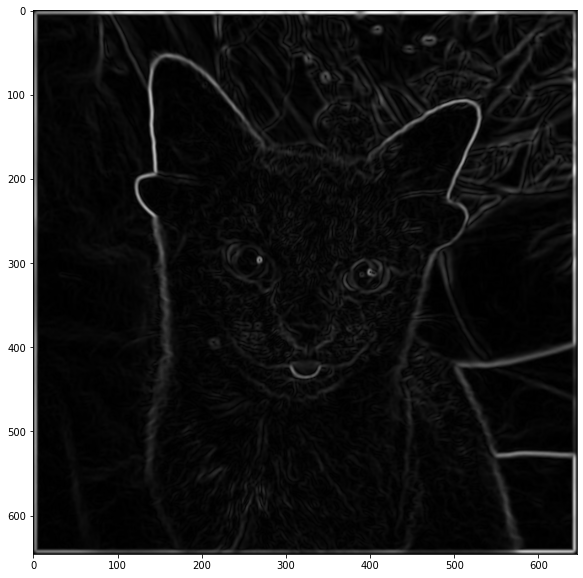

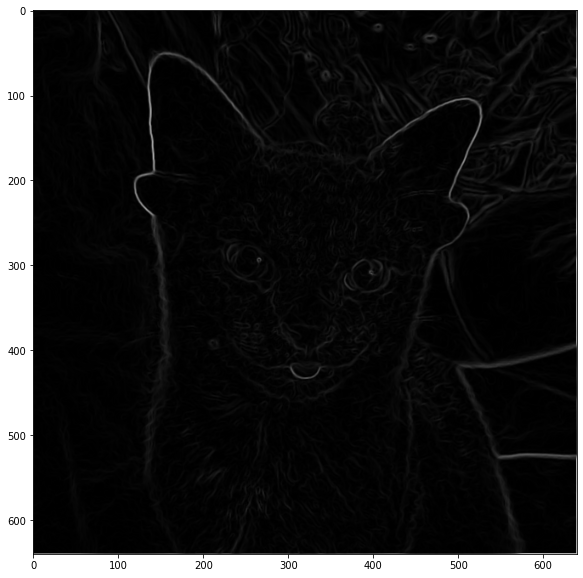

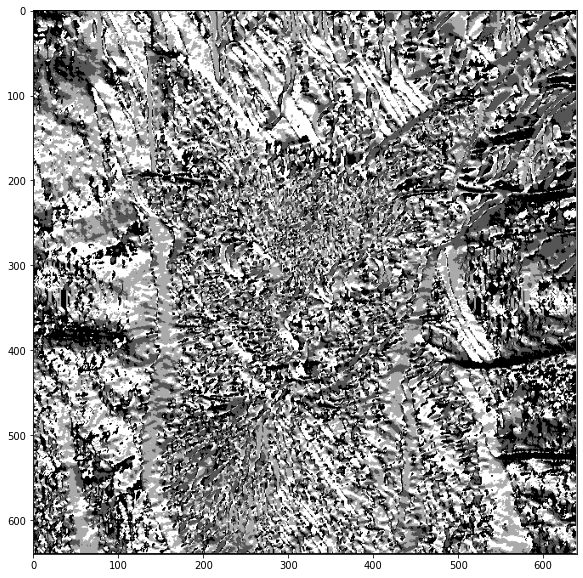

In [6]:
sobel_x = np.array([[ -1 , 0 , 1 ] ,
                    [ -2 , 0 , 2 ] ,
                    [ -1 , 0 , 1 ]])
sobel_y = sobel_x.T

def gradient_sobel(img):
    I_x = signal.convolve2d(img, sobel_x,'same')
    I_y = signal.convolve2d(img, sobel_y,'same')
    magnitude = np.sqrt(I_x ** 2 + I_y ** 2)    
    phase = np.arctan2(I_x, I_y)
    phase = (45 * np.round(phase / (np.pi / 4)) + 180) % 180
    return magnitude, phase
    
plt.figure("Sobel Gradient Gaussian", figsize = figureSize)
a, b = gradient_sobel(image_gr)
a, b = gradient_sobel(gaussian_smooth(image_gr, 7, 1.5))
plt.imshow(a)

plt.figure("Sobel Gradient Median", figsize = figureSize)
a, b = gradient_sobel(image_gr)
a, b = gradient_sobel(median_filter(image_gr, 5))
plt.imshow(a)

plt.figure("Sobel Phase", figsize = figureSize)
plt.imshow(b)

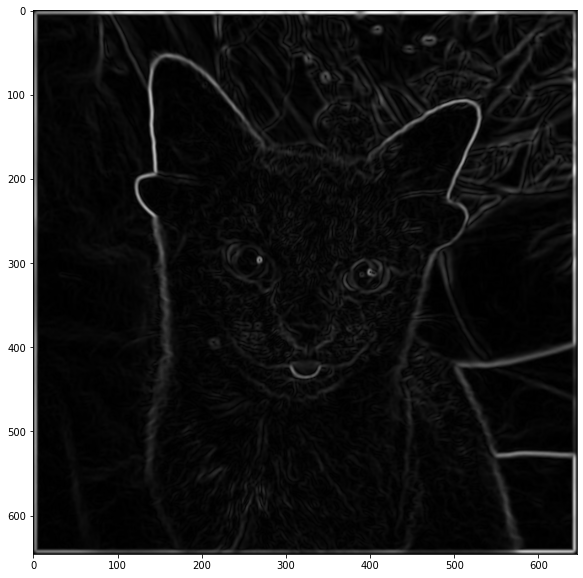

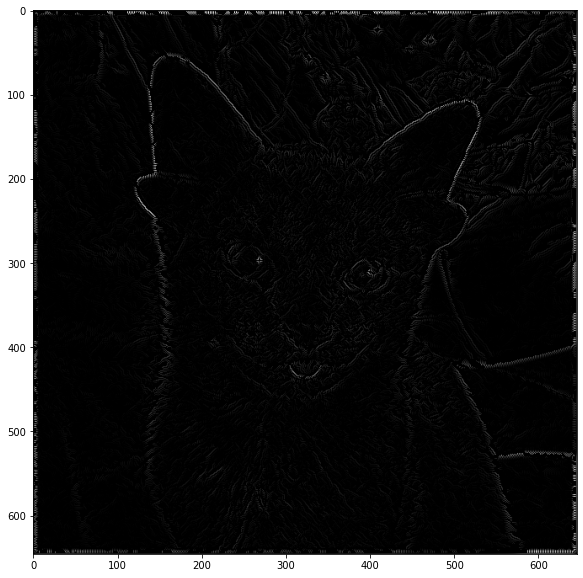

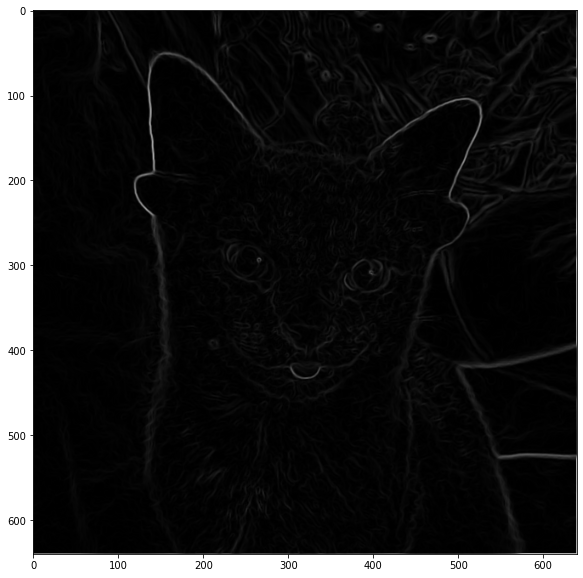

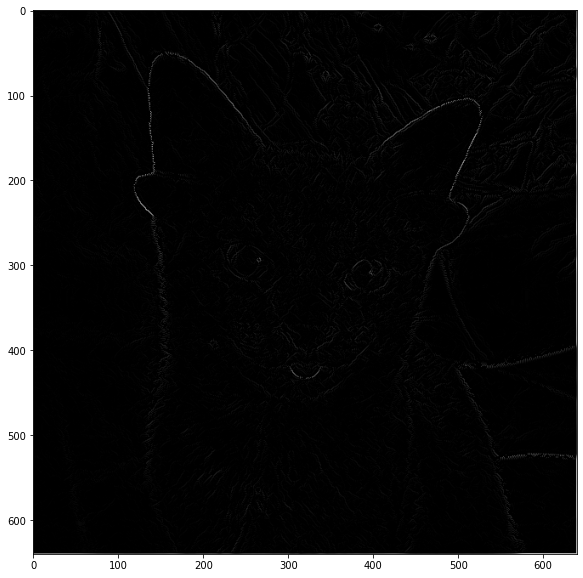

In [7]:
def edge_thin (magnitude, phase):
    y_size = magnitude.shape[0]
    x_size = magnitude.shape[1]
    magnitudel = magnitude.tolist()
    phasel = phase.tolist()
    retl = magnitudel.copy()
    for i in range(1, y_size-1):
        for j in range(1, x_size-1):
            if phasel[i][j] == 0:
                if(magnitudel[i][j+1] > magnitudel[i][j] or magnitudel[i][j-1] > magnitudel[i][j]):
                    retl[i][j] = 0
            elif phasel[i][j] == 45:
                if(magnitudel[i+1][j+1] > magnitudel[i][j] or magnitudel[i-1][j-1] > magnitudel[i][j]):
                    retl[i][j] = 0
            elif phasel[i][j] == 90:
                if(magnitudel[i+1][j] > magnitudel[i][j] or magnitudel[i-1][j] > magnitudel[i][j]):
                    retl[i][j] = 0
            else:
                if(magnitudel[i+1][j-1] > magnitudel[i][j] or magnitudel[i-1][j+1] > magnitudel[i][j]):
                    retl[i][j] = 0
    return np.asarray(retl)

a, b = gradient_sobel(image_gr)
a, b = gradient_sobel(gaussian_smooth(image_gr, 7, 1.5))
plt.figure("Sobel Gradient Gaussian", figsize = figureSize)
plt.imshow(a)
plt.figure("Sobel Gradient Gaussian Thinned", figsize = figureSize)
a = edge_thin(a, b)
plt.imshow(a)

a, b = gradient_sobel(image_gr)
a, b = gradient_sobel(median_filter(image_gr, 5))
plt.figure("Sobel Gradient Median", figsize = figureSize)
plt.imshow(a)
plt.figure("Sobel Gradient Median Thinned", figsize = figureSize)
a = edge_thin(a, b)
plt.imshow(a)
                    